<a href="https://colab.research.google.com/github/BHUVAN-005/IMAGE-CLASSIFICATION-MODEL/blob/main/IMAGE__CLASSIFICATION__MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using CNN on CIFAR-10
#Task: CODTECH Internship - Task 3
# Done By: K Naga Santosh Sai Bhuvan


# Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#  Step 2: Load the CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step



#  Step 3: Visualize Sample Images

<ipython-input-3-cd61350232e2>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


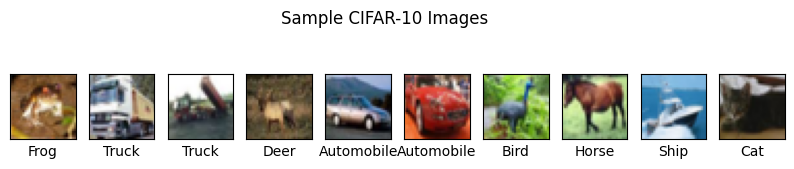

In [3]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

#  Step 4: Build the CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#  Step 5: Compile the Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#  Step 6: Train the Model

In [6]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3408 - loss: 1.7862 - val_accuracy: 0.5519 - val_loss: 1.2398
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.5864 - loss: 1.1739 - val_accuracy: 0.6179 - val_loss: 1.0690
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6478 - loss: 1.0016 - val_accuracy: 0.6358 - val_loss: 1.0547
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6864 - loss: 0.9009 - val_accuracy: 0.6619 - val_loss: 0.9761
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7158 - loss: 0.8147 - val_accuracy: 0.6951 - val_loss: 0.8954
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7332 - loss: 0.7622 - val_accuracy: 0.6974 - val_loss: 0.8835
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7540 - loss: 0.6951 - val_accuracy: 0.6895 - val_loss: 0.9065
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7664 -

#  Step 7: Evaluate the Model

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.7057 - loss: 0.8789

✅ Test Accuracy: 0.7057


#  Step 8: Classification Report & Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
               precision    recall  f1-score   support

    Airplane       0.78      0.73      0.76      1000
  Automobile       0.88      0.78      0.83      1000
        Bird       0.69      0.47      0.56      1000
         Cat       0.52      0.57      0.55      1000
        Deer       0.66      0.64      0.65      1000
         Dog       0.63      0.59      0.61      1000
        Frog       0.63      0.89      0.74      1000
       Horse       0.73      0.76      0.74      1000
        Ship       0.77      0.85      0.81      1000
       Truck       0.83      0.77      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



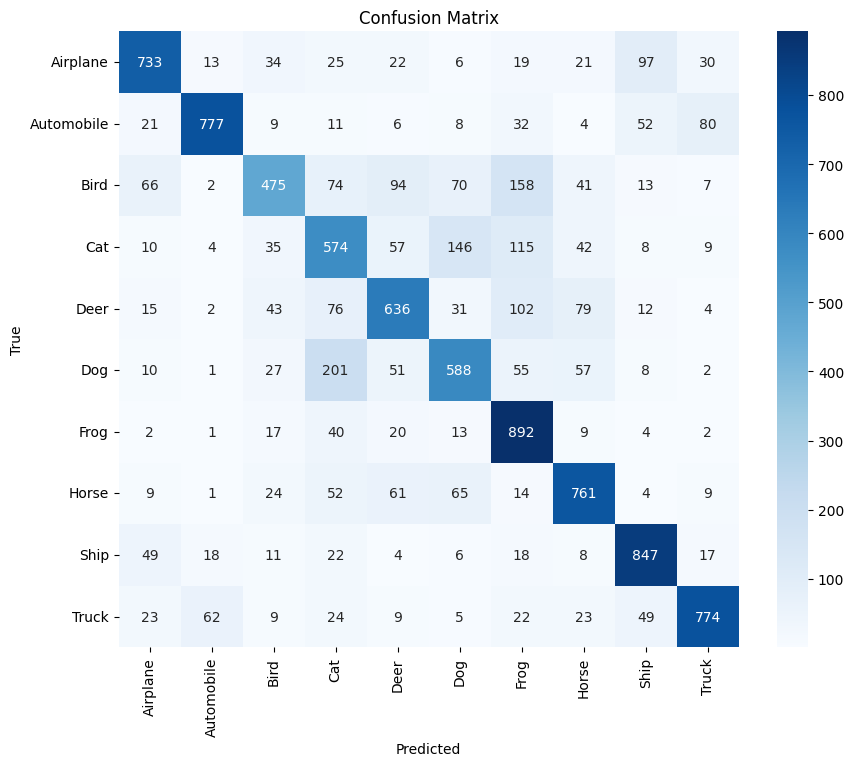

In [8]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test_flat = y_test.flatten()
print("\nClassification Report:\n", classification_report(y_test_flat, y_pred, target_names=class_names))

cm = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()